In [10]:
import numpy as np
from matplotlib.path import Path
from matplotlib import pyplot as plt
import pickle

import sys
sys.path.insert(0,'./src/')

from utils import *
from pipe import *
from pipe_system import PipeSystem
from abstract_pipe import *
from pipe_system.let_index import LetIndex
from multiply_connected_pipe_bhfmm import MultiplyConnectedPipeFromPipeSystem
from fmm2dpy import cfmm2d

In [11]:
with open('large_pipe_global_dense.pickle', 'rb') as f:
    dense_pipe = pickle.load(f)

In [23]:
with open('./exp1/dev_Pipes.pickle','rb') as f:
    pipes, shifts = pickle.load(f)
bdr_pipe = BoundaryPipe([BoundaryLet(-5,0,0,1,-1),BoundaryLet(31,0,np.pi,1,1)])
real_pipes = [RealPipe(p,shift_x=shift[0],shift_y=shift[1]) for p,shift in zip(pipes,shifts)]
ps = PipeSystem(real_pipes,bdr_pipe)
sparse_pipe = MultiplyConnectedPipeFromPipeSystem(ps)
sparse_pipe.clear_geometry()
sparse_pipe.build_geometry(max_distance=.5)
sparse_pipe.build_A_fmm()

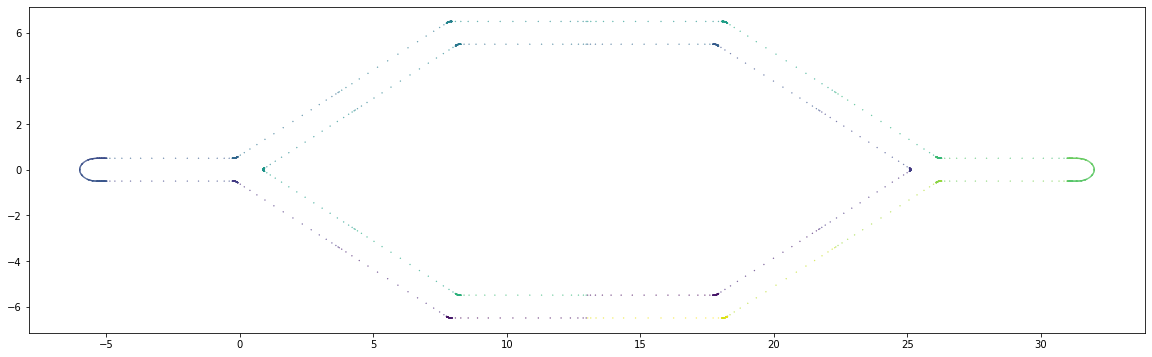

In [24]:
fig, ax = plt.subplots(figsize=(20,6))
ax.scatter(sparse_pipe.t.real,sparse_pipe.t.imag,s=.1,c=np.concatenate([b.a for b in sparse_pipe.boundaries]))

In [27]:
sparse_pipe.build_omegas(tol=1e-10)

In [ ]:
def indices_of_curve(pipe):
    index = np.insert(np.cumsum([c.n_pts for c in pipe.curves]), 0, 0)
    return [(index[i], index[i+1]) for i in range(len(index)-1)]
def indices_of_panel(curve):
    index = np.insert(np.cumsum([c.n_pts for c in curve.panels]), 0, 0)
    return [(index[i], index[i+1]) for i in range(len(index)-1)]